In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox

In [72]:
df = pd.read_csv('data/clean_data_visual.csv')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8910938 entries, 0 to 8910937
Data columns (total 13 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Unnamed: 0                int64  
 1   DayOfTheWeek              int64  
 2   MinuteOfTheDay            int64  
 3   Hour                      int64  
 4   Latitude                  float64
 5   Longitude                 float64
 6   Location                  object 
 7   ParkingSpaceCount         int64  
 8   ParkingTimeLimitCategory  float64
 9   ParkingCategory           object 
 10  HasAvailability           bool   
 11  AvailableSpace            int64  
 12  AvailablePercentage       float64
dtypes: bool(1), float64(4), int64(6), object(2)
memory usage: 824.3+ MB


<AxesSubplot:ylabel='HasAvailability'>

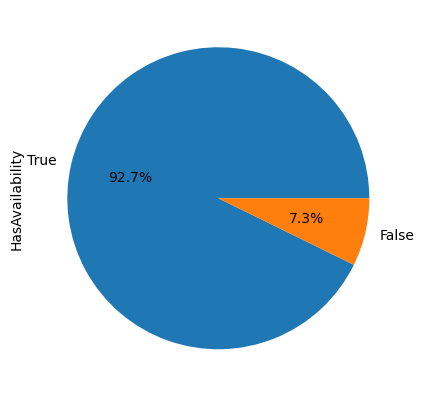

In [4]:
availability = df['HasAvailability'].value_counts()
fig = plt.figure(figsize=(5, 5), dpi= 100)
ax = plt.subplot(111)

availability.plot(kind='pie', ax=ax, autopct='%1.1f%%',
                   shadow= False, startangle=0)

# Time Analysis

imbalanced data where majority are availabel and minority aren't, need resampling

In [5]:
df_has_available = df.loc[df['HasAvailability'] == True]
df_no_available = df.loc[df["HasAvailability"] == False]

In [74]:
df_hour = df[['DayOfTheWeek','Hour', 'AvailablePercentage']]
df_hour = df_hour.loc[df_hour['Hour'] < 22]
grouped_hour = df_hour.groupby(['DayOfTheWeek','Hour']).mean()
unstack_hour = grouped_hour.unstack()
list1 = [0,1,2,3,4,5]
list2 = ['Mon','Tue','Wed','Thu','Fri','Sat']
unstack_hour = unstack_hour.rename(index=dict(zip(list1,list2)))
list3 = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
list4 = ['8:00','9:00','10:00','11:00','12:00','12:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00']
plot_df_hour = unstack_hour['AvailablePercentage'].transpose()
plot_df_hour = plot_df_hour.rename(index=dict(zip(list3,list4)))
plot_df_hour

DayOfTheWeek,Mon,Tue,Wed,Thu,Fri,Sat
Hour,,,,,,
8:00,0.768957,0.762842,0.763964,0.768311,0.768325,0.847665
9:00,0.677540,0.671162,0.676557,0.680174,0.680585,0.767894
10:00,0.648962,0.640815,0.636722,0.642536,0.651122,0.717212
11:00,0.624307,0.616190,0.608022,0.613787,0.615277,0.666873
12:00,0.619336,0.614754,0.601814,0.606066,0.597542,0.646469
12:00,0.631636,0.620332,0.610426,0.602927,0.603305,0.635517
14:00,0.659198,0.649220,0.637143,0.642038,0.627812,0.642332
15:00,0.687967,0.678033,0.665891,0.663792,0.647543,0.653441
16:00,0.711117,0.690273,0.680177,0.671213,0.653614,0.653082


<AxesSubplot:xlabel='Hour of the day', ylabel='Average Available Percentage'>

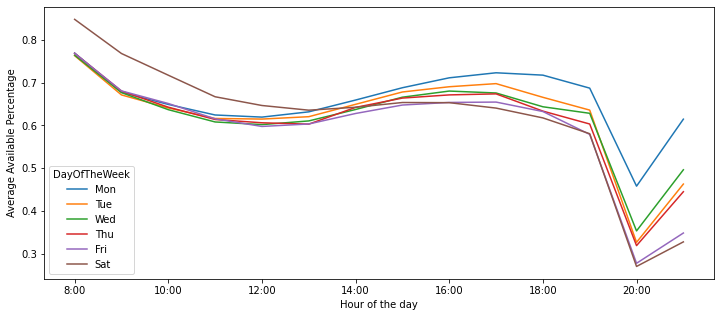

In [89]:
plot_df_hour.plot(figsize=(12, 5),
xlabel='Hour of the day', ylabel='Average Available Percentage')

<AxesSubplot:xlabel='Day of the week', ylabel='Average Available Percentage'>

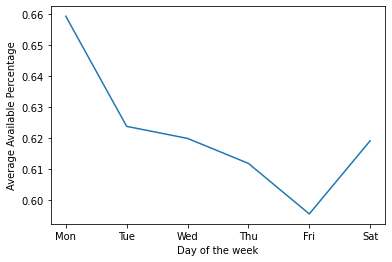

In [90]:
agg_week_available = pd.DataFrame()
for i in plot_df_hour:
    agg_week_available[i] = pd.Series(plot_df_hour[i].mean())
agg_week_available.transpose().plot(legend=False,
xlabel='Day of the week', ylabel='Average Available Percentage')


# Other features analysis

In [79]:
ParkingTimeLimitCategoryAll = df['ParkingTimeLimitCategory'].value_counts().sort_index()
ParkingTimeLimitCategory = df_has_available['ParkingTimeLimitCategory'].value_counts().sort_index()

<AxesSubplot:title={'center':'Occupany Percentage by Parking Time Limit Category \n'}, xlabel='Time Limit (minutes)', ylabel='Occupany Percentage'>

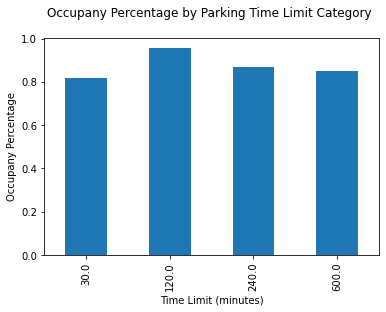

In [13]:
agg_category = ParkingTimeLimitCategory / ParkingTimeLimitCategoryAll
agg_category.plot.bar(title="Occupany Percentage by Parking Time Limit Category \n", 
xlabel='Time Limit (minutes)', ylabel='Occupany Percentage')

In [14]:
ParkingSpaceCount = df_has_available['ParkingSpaceCount'].value_counts().sort_index()
ParkingSpaceCountAll = df['ParkingSpaceCount'].value_counts().sort_index()

<AxesSubplot:title={'center':'Availability Percentage by Parking Space Count \n'}, xlabel='Parking Space Count', ylabel='Avalability Percentage'>

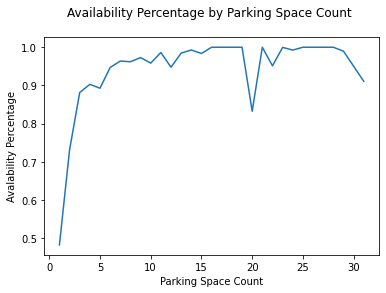

In [15]:
agg_space_count = ParkingSpaceCount / ParkingSpaceCountAll
agg_space_count.plot.line(title="Availability Percentage by Parking Space Count \n", 
xlabel='Parking Space Count', ylabel='Avalability Percentage')

# Location analysis

In [80]:
location = df[["Location",'Longitude','Latitude','AvailablePercentage']]
loc_df = location.groupby("Location").mean()


In [81]:
loc_df = loc_df.reset_index(drop=True)
loc_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Longitude            472 non-null    float64
 1   Latitude             472 non-null    float64
 2   AvailablePercentage  472 non-null    float64
dtypes: float64(3)
memory usage: 11.2 KB


In [82]:
points = loc_df.to_numpy()
points

array([[ 4.76158666e+01, -1.22316762e+02,  6.28976710e-01],
       [ 4.76158788e+01, -1.22316965e+02,  5.68868838e-01],
       [ 4.76158625e+01, -1.22318060e+02,  7.78436157e-02],
       ...,
       [ 4.76178645e+01, -1.22344014e+02,  6.51225664e-01],
       [ 4.76176968e+01, -1.22344075e+02,  4.24108601e-01],
       [ 4.76182036e+01, -1.22344950e+02,  5.88549628e-01]])

In [99]:
len(points)

472

In [83]:
import folium
from folium import plugins

In [97]:
m1 = folium.Map(location=[47.6256, -122.3344], zoom_start=14)
plugins.HeatMap(points, radius = 18, min_opacity = 0.1, max_val = 50,gradient={.5: 'blue', .7: 'lime', .95: 'red'}).add_to(m1)


# you can run this command to save the map webpage
m1.save('data/map1.html')
m1

# if you're getting "Make this notebook trusted to load map : File -> Trust Notebook"
# switch to another browser (safari) might help

/var/folders/50/_bd3qq2s24384tp_h3lqyhgh0000gn/T/ipykernel_35489/674337672.py:2: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  plugins.HeatMap(points, radius = 18, min_opacity = 0.1, max_val = 50,gradient={.5: 'blue', .7: 'lime', .95: 'red'}).add_to(m1)
